# Test NeuralNet class

In [14]:
from NeuralNet import NeuralNet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load the dataset

Epoch 0/1000 - Training Error: 30782224098.629292 - Validation Error: 30509560630.036697
Epoch 100/1000 - Training Error: 30782224098.629292 - Validation Error: 30509560630.036697
Epoch 200/1000 - Training Error: 30782224098.629292 - Validation Error: 30509560630.036697
Epoch 300/1000 - Training Error: 30782224098.629292 - Validation Error: 30509560630.036697
Epoch 400/1000 - Training Error: 30782224098.629292 - Validation Error: 30509560630.036697
Epoch 500/1000 - Training Error: 30782224098.629292 - Validation Error: 30509560630.036697
Epoch 600/1000 - Training Error: 30782224098.629292 - Validation Error: 30509560630.036697
Epoch 700/1000 - Training Error: 30782224098.629292 - Validation Error: 30509560630.036697
Epoch 800/1000 - Training Error: 30782224098.629292 - Validation Error: 30509560630.036697
Epoch 900/1000 - Training Error: 30782224098.629292 - Validation Error: 30509560630.036697


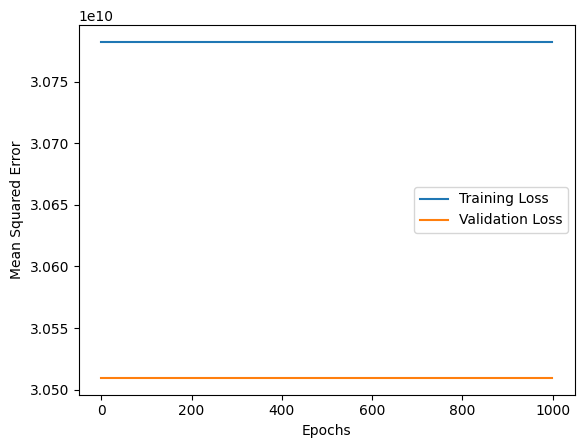

Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
df = pd.read_csv('data_clean.csv')
df = df.select_dtypes(include = ['float64', 'int64'])

y = df['SalePrice'].astype(int).values
X = df.drop('SalePrice', axis=1).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# y_train = y_train.reshape(-1, 1)
# X_test = scaler.transform(X_test)
# y_test = y_test.reshape(-1, 1)

nn = NeuralNet(layers=[X_train.shape[1], 64, 32, 1])
nn.fit(X_train, y_train)

train_loss, val_loss = nn.loss_epochs()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
predictions = nn.predict(X_test)
print("Predictions:", predictions.flatten())

In [13]:
df.head(100)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.000000,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.000000,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,77.000000,9206,6,5,1985,1985,336.0,0,0,...,192,46,0,0,0,0,0,6,2010,178000
96,90,64.000000,7018,5,5,1979,1979,0.0,0,0,...,0,0,0,0,0,0,0,6,2009,118964
97,20,94.000000,10402,7,5,2009,2009,0.0,0,0,...,0,36,0,0,0,0,0,5,2010,198900
98,50,70.049958,7758,7,4,1931,1950,600.0,224,0,...,0,0,0,0,184,0,0,6,2007,169500
